# Importação de bibliotecas e implementação de função

In [93]:
pip install networkx

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import networkx as nx

Aqui definimos a medida de completude de uma matriz B, isso é, o quanto ela não é esparsa (contém zeros). A medida é dada por:
$$
\text{Completude}(B) = \frac{\sum_{i,j}|b_{i,j}|}{\sqrt{\sum_{i,j}b_{i,j}^2}}
$$

In [95]:
def fullness(matrix):
  return np.absolute(matrix).sum()/np.sqrt(
      np.array([[elem*elem for elem in inner] for inner in matrix]).sum())

# Comparação entre os modelos CAR e SAR

A seguir, apresentamos um exemplo de grafo que queremos modelar por meio do CAR ou do SAR.

In [96]:
# Matriz de adjacência
W = np.array([[0, 1, 1, 1, 0, 0],
              [1, 0, 1, 0, 1, 0],
              [1, 1, 0, 1, 1, 0],
              [1, 0, 1, 0, 1, 1],
              [0, 1, 1, 1, 0, 1],
              [0, 0, 0, 1, 1, 0]])

In [97]:
W = pd.DataFrame(W)

In [98]:
graph = nx.Graph(W)

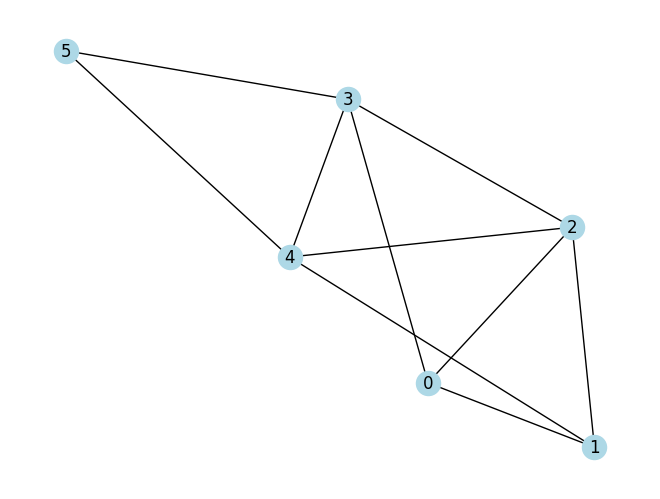

In [99]:
# Grafo
nx.draw(graph, labels = dict(zip(W.columns, range(6))), with_labels = True, node_color = "lightblue")

## Variância do modelo CAR

A variância de um modelo CAR é dada por
$$
\Sigma_{+} = \sigma^2 (I - \rho_c W_{+})^{-1}M_{+}
$$

em que
*   $\rho_c$ é um número entre -1 e 1;
*   $W_{+}$ é a matriz de adjacência, ou de pesos, padronizada por linha;
*   $M_{+}$ é uma matriz diagonal com valores $m_{i,i} = \frac{1}{w_{i,+}}$
*   $w_{i,+}$ é o valor correspondente à soma dos valores da matriz de pesos na linha i.





In [100]:
sigma2 = 2

In [101]:
rho_c = 0.9

In [102]:
W_plus = W.apply(lambda row: row/row.sum(), axis = 1)

In [103]:
W_plus = np.array(W_plus)

In [104]:
rho_c * W_plus

array([[0.   , 0.3  , 0.3  , 0.3  , 0.   , 0.   ],
       [0.3  , 0.   , 0.3  , 0.   , 0.3  , 0.   ],
       [0.225, 0.225, 0.   , 0.225, 0.225, 0.   ],
       [0.225, 0.   , 0.225, 0.   , 0.225, 0.225],
       [0.   , 0.225, 0.225, 0.225, 0.   , 0.225],
       [0.   , 0.   , 0.   , 0.45 , 0.45 , 0.   ]])

Aqui analisamos a completude da matriz de pesos padronizada por linha e ajustada por $\rho_c$.

In [105]:
fullness(rho_c * W_plus)

4.333890711087691

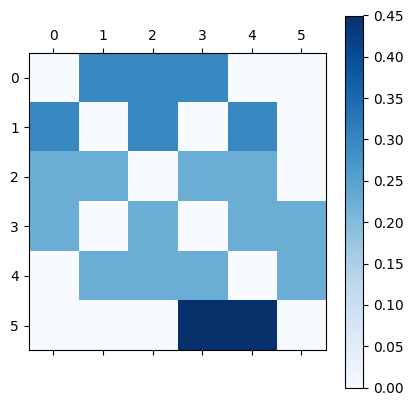

In [106]:
plt.matshow(rho_c * W_plus, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [107]:
M_plus = np.diag(W.apply(lambda row: 1/row.sum(), axis = 1))

In [108]:
M_plus

array([[0.33333333, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25      , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.25      ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       ]])

In [109]:
sigma_plus = sigma2 * np.matmul(np.linalg.inv(np.identity(6) - rho_c * W_plus), M_plus)

In [110]:
sigma_plus

array([[1.53112205, 0.99560293, 0.96209913, 0.9238159 , 0.82545524,
        0.78717201],
       [0.99560293, 1.53112205, 0.96209913, 0.82545524, 0.9238159 ,
        0.78717201],
       [0.96209913, 0.96209913, 1.34010254, 0.90479542, 0.90479542,
        0.81431587],
       [0.9238159 , 0.82545524, 0.90479542, 1.34913566, 0.92290616,
        1.02241882],
       [0.82545524, 0.9238159 , 0.90479542, 0.92290616, 1.34913566,
        1.02241882],
       [0.78717201, 0.78717201, 0.81431587, 1.02241882, 1.02241882,
        1.92017694]])

## Variância do modelo SAR

A precisão do modelo SAR pode ser descrita como
$$
\Sigma_{+}^{-1} = (I - B^T) \ \Omega^{-1}(I - B)
$$
em que
*   $\Sigma_{+}$ é a mesma matriz de variâncias e covariâncias do modelo CAR;
*   $\Sigma_{+}^{-1} = L L^T$, ou seja, pode ser decomposta (não unicamente) em uma matriz L - como por meio da raiz quadrada da matriz ou da decomposição de Cholesky, por exemplo;
*   $L = G - P$, em que $G$ é uma matriz diagonal e $P$ é uma matriz com zeros na diagonal;
*   $\Omega^{-1} = GG$ e, por fim,
*   $B^T = PG^{-1}$

Dessa forma, é possível encontrar, a partir da matriz de variâncias e covariâncias de um modelo CAR, a matriz $B$ de pesos no modelo SAR.



### Cholesky decomposition

Fazemos a decomposição do inverso da matriz de variâncias e covariâcias ($\Sigma_{+}^{-1}$) do modelo CAR.

In [111]:
L = np.linalg.cholesky(np.linalg.inv(sigma_plus))

In [112]:
L

array([[ 1.22474487e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.67423461e-01,  1.16833214e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.67423461e-01, -5.00713776e-01,  1.27054544e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.67423461e-01, -1.15549333e-01, -5.05969423e-01,
         1.26318775e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.87386936e-16, -3.85164443e-01, -5.05969423e-01,
        -5.94140143e-01,  1.11473799e+00,  0.00000000e+00],
       [ 1.41083169e-17,  6.38283095e-17, -3.53385467e-18,
        -3.56241580e-01, -5.93554207e-01,  7.21654585e-01]])

Verificamos que $\Sigma_{+}^{-1} = L L^T$

In [113]:
np.matmul(L, L.T).round(10)

array([[ 1.5 , -0.45, -0.45, -0.45,  0.  ,  0.  ],
       [-0.45,  1.5 , -0.45,  0.  , -0.45,  0.  ],
       [-0.45, -0.45,  2.  , -0.45, -0.45, -0.  ],
       [-0.45,  0.  , -0.45,  2.  , -0.45, -0.45],
       [ 0.  , -0.45, -0.45, -0.45,  2.  , -0.45],
       [ 0.  ,  0.  , -0.  , -0.45, -0.45,  1.  ]])

In [114]:
np.linalg.inv(sigma_plus).round(10)

array([[ 1.5 , -0.45, -0.45, -0.45,  0.  , -0.  ],
       [-0.45,  1.5 , -0.45, -0.  , -0.45, -0.  ],
       [-0.45, -0.45,  2.  , -0.45, -0.45,  0.  ],
       [-0.45,  0.  , -0.45,  2.  , -0.45, -0.45],
       [ 0.  , -0.45, -0.45, -0.45,  2.  , -0.45],
       [ 0.  ,  0.  , -0.  , -0.45, -0.45,  1.  ]])

Tomamos os valores da diagonal de $L$ para construir a matriz diagonal $G$

In [115]:
G = []
for i in range(6):
  G.append(L[i,i])

In [116]:
G = np.diag(G)

In [117]:
G

array([[1.22474487, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 1.16833214, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.27054544, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 1.26318775, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.11473799,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.72165459]])

Tomamos $P = -L$ e subtraímos os elementos da diagonal (pois deverão ser zero), para que $L = G - P$

In [118]:
P = - L
for i in range(6):
  P[i, i] = 0

In [119]:
P

array([[ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.67423461e-01,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.67423461e-01,  5.00713776e-01,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.67423461e-01,  1.15549333e-01,  5.05969423e-01,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.87386936e-16,  3.85164443e-01,  5.05969423e-01,
         5.94140143e-01,  0.00000000e+00, -0.00000000e+00],
       [-1.41083169e-17, -6.38283095e-17,  3.53385467e-18,
         3.56241580e-01,  5.93554207e-01,  0.00000000e+00]])

Tomamos $\Omega^{-1} = GG$

In [120]:
inv_omega = np.matmul(G, G)

E, por fim, $B^T = PG^{-1}$

In [121]:
transpose_B = np.matmul(P, np.linalg.inv(G))

In [122]:
B = transpose_B.T

Agora, verificamos a completude da matriz de pesos do modelo SAR, $B$.

In [123]:
fullness(B)

3.162026914244829

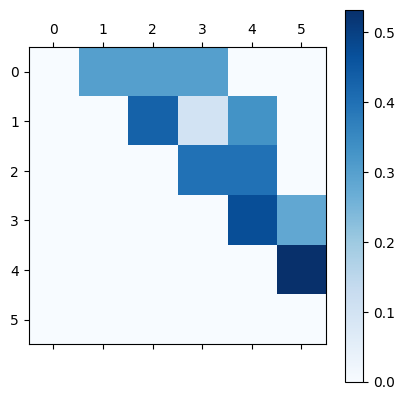

In [124]:
plt.matshow(B, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

Finalmente, comparamos as matrizes inversas das variâncias dos modelos CAR e SAR.

In [125]:
np.matmul(np.matmul((np.identity(6) - B.T), inv_omega), np.identity(6) - B).round(10)

array([[ 1.5 , -0.45, -0.45, -0.45,  0.  ,  0.  ],
       [-0.45,  1.5 , -0.45,  0.  , -0.45,  0.  ],
       [-0.45, -0.45,  2.  , -0.45, -0.45, -0.  ],
       [-0.45,  0.  , -0.45,  2.  , -0.45, -0.45],
       [ 0.  , -0.45, -0.45, -0.45,  2.  , -0.45],
       [ 0.  ,  0.  , -0.  , -0.45, -0.45,  1.  ]])

In [126]:
np.linalg.inv(sigma_plus).round(10)

array([[ 1.5 , -0.45, -0.45, -0.45,  0.  , -0.  ],
       [-0.45,  1.5 , -0.45, -0.  , -0.45, -0.  ],
       [-0.45, -0.45,  2.  , -0.45, -0.45,  0.  ],
       [-0.45,  0.  , -0.45,  2.  , -0.45, -0.45],
       [ 0.  , -0.45, -0.45, -0.45,  2.  , -0.45],
       [ 0.  ,  0.  , -0.  , -0.45, -0.45,  1.  ]])

### Square-root matrix

In [128]:
L = scipy.linalg.sqrtm(np.linalg.inv(sigma_plus))

In [129]:
G = []
for i in range(6):
  G.append(L[i,i])

In [130]:
G = np.diag(G)

In [131]:
P = - L
for i in range(6):
  P[i, i] = 0

In [132]:
inv_omega = np.matmul(G, G)

In [133]:
transpose_B = np.matmul(P, np.linalg.inv(G))

In [134]:
B = transpose_B.T

In [135]:
fullness(B)

4.890415380299261

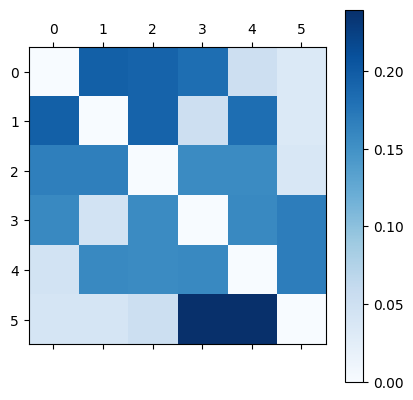

In [136]:
plt.matshow(B, cmap=plt.cm.Blues)
plt.colorbar()
plt.show()

In [137]:
np.matmul(np.matmul((np.identity(6) - B.T), inv_omega), np.identity(6) - B).round(10)

array([[ 1.5 , -0.45, -0.45, -0.45,  0.  ,  0.  ],
       [-0.45,  1.5 , -0.45, -0.  , -0.45, -0.  ],
       [-0.45, -0.45,  2.  , -0.45, -0.45,  0.  ],
       [-0.45, -0.  , -0.45,  2.  , -0.45, -0.45],
       [ 0.  , -0.45, -0.45, -0.45,  2.  , -0.45],
       [ 0.  , -0.  ,  0.  , -0.45, -0.45,  1.  ]])

In [138]:
np.linalg.inv(sigma_plus).round(10)

array([[ 1.5 , -0.45, -0.45, -0.45,  0.  , -0.  ],
       [-0.45,  1.5 , -0.45, -0.  , -0.45, -0.  ],
       [-0.45, -0.45,  2.  , -0.45, -0.45,  0.  ],
       [-0.45,  0.  , -0.45,  2.  , -0.45, -0.45],
       [ 0.  , -0.45, -0.45, -0.45,  2.  , -0.45],
       [ 0.  ,  0.  , -0.  , -0.45, -0.45,  1.  ]])